In [6]:
%matplotlib inline

In [7]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [46]:
STATES = 5
GAMMA = 0.8
ALPHA = 0.1

T = np.zeros((STATES, STATES))
for i in range(STATES):
    rand = np.random.random_sample((1, STATES))
    T[i] = rand / np.sum(rand)
    
T[4,:] = [0, 0, 0, 0, 1]
    
r = np.zeros((STATES))
r[2] = 1

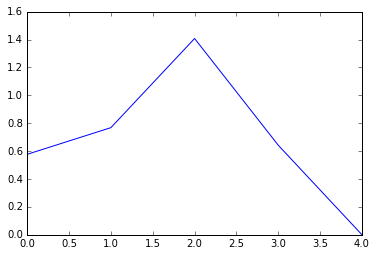

In [47]:
# Iteratively solve for state values
v = [0] * STATES

for s in range(STATES-1):
    for i in range(100):
        si = s
        while si != STATES - 1:
            si_prev = si
            si = np.random.choice(range(STATES), p=T[si,:])
            v[si_prev] += ALPHA * (r[si_prev] + GAMMA * v[si] - v[si_prev])
            
fig = plt.plot(v)

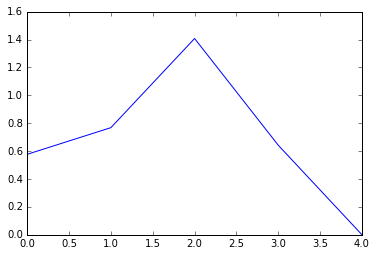

In [48]:
v_solve = np.linalg.inv(np.identity(STATES) - GAMMA * T).dot(r)

fig = plt.plot(v)

In [76]:
# Define network to predict value function
IN = 1
HIDDEN = 3
OUT = 1

x = tf.placeholder(tf.float32)
t = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal((HIDDEN, IN)))
b1 = tf.Variable(tf.random_normal((HIDDEN, 1)))

W2 = tf.Variable(tf.random_normal((HIDDEN, HIDDEN)))
b2 = tf.Variable(tf.random_normal((HIDDEN, 1)))

W3 = tf.Variable(tf.random_normal((OUT, HIDDEN)))

h1 = tf.nn.sigmoid(tf.matmul(W1, x) + b1)
h2 = tf.nn.sigmoid(tf.matmul(W2, h1) + b2)

y = tf.matmul(W3, h2)

cost = tf.reduce_mean(tf.square(y - t))

In [77]:
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [78]:
if 'session' in globals():
    session.close()
    
session = tf.InteractiveSession()
session.run(tf.initialize_all_variables())

In [90]:
for i in range(20000):
    s_prev = np.random.randint(STATES)
    features_1 = [[s_prev]]

    # features_1 = [[si]]
    # v1 = y.eval(feed_dict={x: features_1})

    s = np.random.choice(range(STATES), p=T[s_prev,:])
    
    features_2 = [[s]]
    v2 = y.eval(feed_dict={x: features_2})
    
    target = r[s_prev] + GAMMA * v2
    
    session.run(train, feed_dict={x:features_1, t:target})

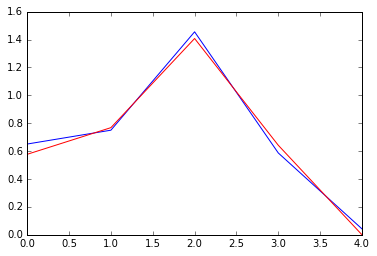

In [91]:
fig = plt.plot([y.eval(feed_dict={x: [[si]]})[0] for si in range(STATES)], c='b')
plt.plot(v, c='r')